# Simulation of Diffusion and Brownian Motion using Random Walks
PHYS640 Computational Physics Fall 2020
By Zhibo Zhang

### Introduction
Microscopically, nothing is ever still. Molecules of perfume from an open bottle will slowly diffuse across a room. Chemicals will spread through your cells. As Robert Brown observed over a century ago, microscopic particles in pollen grains and particles of dust in a cup of water will jitter endlessly, subject to what we now call Brownian motion.  See the Youtube video below. Diffusion and Brownian Motion are some of the most ubiquitous processes in physics, chemistry, and biology; conceptual extensions to other “random” processes are also found throughout mathematics and economics. In this part, We’ll simulate the Brownian motion as a random walk process. The simulations will help us understand many important and interesting physics behind the diffusion process. 

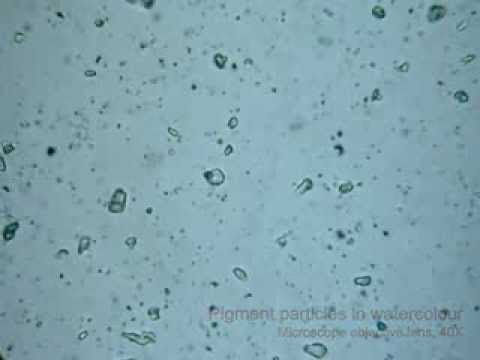

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("f4mp4TWYfBs")

### Random Walks

As we walk down the street, the distance, $x$ , we travel is linearly proportional to the number of
steps, $N$ , that we take; $x$ is also proportional to the time, $t$ , that we spend on walking. 

This is not the
case, however, for a microscopic object – e.g. a perfume molecule in the air, or a microparticle in a
dish of water. These objects are constantly buffeted by the molecules around them, a consequence
of the molecular nature of matter and also of finite temperature (as we’ll see below). They exhibit
random walks, where each “step” is in a random direction relative to the one that preceded it. (Of
course, we can have both random and directed motion – for example if gravity pulls in one
direction, “biasing” our random walk. We’ll consider here unbiased random walks, however.) 

__How are distance $x$ and time $t$ related for a random walker?__

The canonical random walker, always invoked as an example, is the “drunken sailor” who
starts at a lamppost at position $x = 0$ and, every $\tau$ seconds, randomly moves left or right by one
step of size $\delta$ . (We’re considering a one-dimensional walk, for simplicity. The 2D and 3D cases are
very similar.) After many ( $N$ ) steps, where does the sailor end up?

The answer is that we don’t know **exactly**
where the sailor ends up – it’s a random process! (See Figure 1 for a few random walk trajectories.)
** However,** we can  examine the probabilities of ending up in various places. We can consider lots
of random walkers, and take the average of all of their trajectories to get at “average” properties.

Now let's first write a few lines of code to simulation 1D random walk

(100, 20)

0.174


NameError: name 'Xsq' is not defined

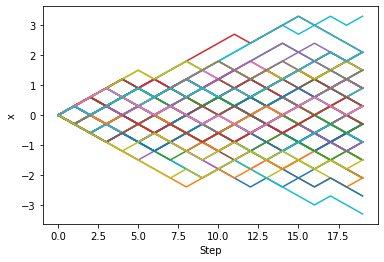

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn

def random_walker_1d(Nw,Ns,L=1):
    X = np.zeros([Nw,Ns])
    fig,ax=plt.subplots()
    for i in range(Nw):
        for j in range(1,Ns):
            RN =np.random.random()
            if RN <=0.5:
                X[i,j] = X[i,j-1] + L
            else:
                X[i,j] = X[i,j-1] - L
        ax.plot(X[i,:])
    ax.set_xlabel('Step')
    ax.set_ylabel('x')
    
    return X

Nw = 100
Ns = 20
L  = 0.3
X = random_walker_1d(Nw,Ns,L)  
print(X.shape)
#what is the location of random walker #59 at step 5
print()

#what to know mean location E<X> at step 15                    
print(X[:,15].mean())
#what is the mean of squred x at step 10
Xsqured = X**2
print(Xsq)

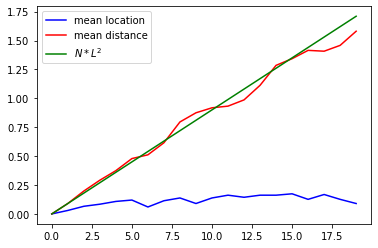

In [18]:
# look at the mean location and mean distance
fig,ax = plt.subplots()
xmean = np.mean(X,axis=0)
x2mean = np.mean(X**2,axis=0)

ax.plot(xmean,c='b',label='mean location')
ax.plot(x2mean,c='r',label='mean distance')
ax.plot(np.arange(Ns)*L*L,c='g',label=r'$N*L^2$')
ax.legend()



bin boundary [-25.8  -20.82 -15.84 -10.86  -5.88  -0.9    4.08   9.06  14.04  19.02
  24.  ]
number of walkers in each bin [   9.   68.  229.  739. 1236. 1222.  976.  388.  115.   18.]


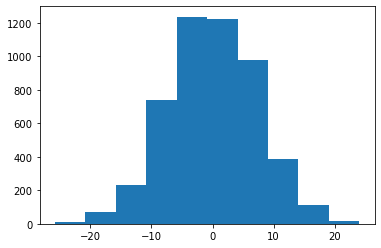

In [6]:
# look at the distribution of walkers
fig,ax = plt.subplots()
step = 600
Nx, bins, patches=plt.hist(X[:,step])

print('bin boundary',bins)
print('number of walkers in each bin',Nx)

**Now let's examine How are distance $x$ and time step $t$ related for our 1D random walker?**

In the above example, we have 100 random walkers. Each of them walked 100 time steps. First, let's define the ensemble average among the walkers as:

$$ <X>  = \frac{1}{Nwalker} \sum_{i=1}^{Nwalker} X_i $$

Now, let's plot $<X>$ as a fuction of time step:



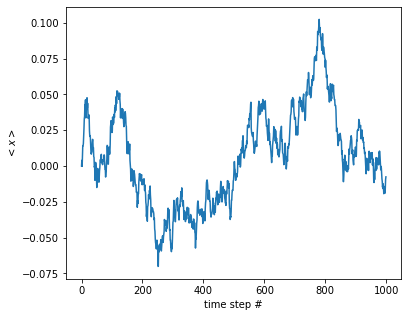

In [7]:
fig, ax = plt.subplots( figsize=[6,5])
ax.plot(np.mean(X,axis=0))
ax.set_xlabel('time step #'); ax.set_ylabel(r'$<x>$')
plt.show()

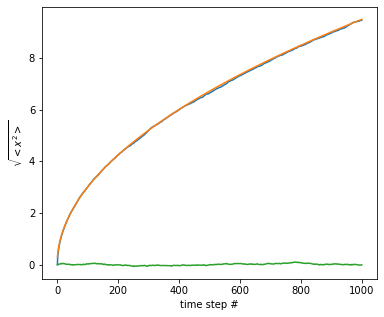

In [8]:
fig, ax = plt.subplots( figsize=[6,5])
step = np.arange(1,Ns+1)
ax.plot(step,np.sqrt(np.mean(X**2,axis=0)))
ax.plot(step,np.sqrt(step)*L)
ax.plot(step,np.mean(X,axis=0))
ax.set_xlabel('time step #'); ax.set_ylabel(r'$\sqrt{<x^2>}$')
plt.show()


From the figure we can see that  $<x^2(N)>$ is approximately linear with N . **Why?** 

Since $x(N) = x(N −1) ±\delta $

$$x^2 (N) = [x(N −1) ±δ ]^2 = x^2 (N +1) ± 2δ x(N −1) +δ^2$$  

Take ensemble average of the above equation,  the average value is

$$<x^2 (N)> = <x^2 (N −1)> ± <2δ x(N −1)> +<δ^2> $$ 

The middle term  <2δ x(N −1)> is zero, as we noted $<x>=0$ above, so

$$<x^2 (N) >= <x^2 (N −1)> +<δ^2>$$ . 

At each step, the mean-squared-displacement increases by one stepsquared. Since $x^2 (0) = 0, x^2 (1) =δ^2 , x^2 (2) = 2δ^2$ , etc. We find that

** $$<x^2 (N)> = Nδ^2$$ **

The characteristic distance traveled is $<x^2 (N)> ^{1/2}$ : We see that

$$<x^2 (N)> ^{1/2} = N ^{1/2} δ$$
Each step takes some amount of time, $\tau$; the total time $t = N\tau$ , so:
$$<x^2 (N)>  = (\frac{δ^2} {\tau}) t ;   <x^2 (N)>^{1/2}  \propto t^{1/2}  $$

 So rather than increasing linearly with time, the characteristic distance our random walker
travels increases as the square root of time. To go twice as far, the walker needs to take four
times as many steps. This is the key characteristic of Brownian motion!



(500, 1000)
500.0


Text(0, 0.5, 'number of walkers')

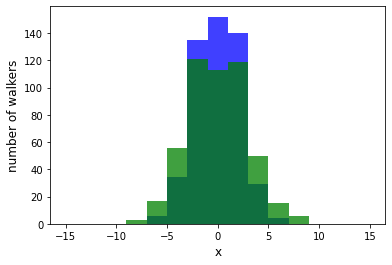

In [7]:
# let's look at the distribution of walkers horizontally at certain time step
print(X.shape)
step1,step2 = 50,90
dx = 2.0
l = np.arange(-15,15+dx/2,dx)
Nx1, bins, patches = plt.hist(X[:,step1],bins=l,facecolor='b', alpha=0.75)
Nx2, bins, patches = plt.hist(X[:,step2],bins=l,facecolor='g', alpha=0.75)
print(Nx1.sum())
plt.xlabel('x', fontsize='large')
plt.ylabel('number of walkers',fontsize='large')


### Diffusion
We can define a so-called **diffusion coefficient**,
$$ D = \frac{δ^2} {2\tau}$$
and therefore write:
$$ <x^2 (t)> = 2Dt $$for a 1D random walk. In two and three dimensions, one can show (quite easily) that  $ <x^2 (t)> = 4Dt $for a **2D** random walk and $ <x^2 (t)> = 6Dt $for a **3D** random walk.

A small molecule in room-temperature water has $D ≈10^{−3} mm^2/s$ , and so will diffuse about
10 μm $(10×10^{−6} m )$, a typical diameter of one of your cells, in about 20 ms. The same molecule would
diffuse 10 mm in 20,000 s (5 hours). Since time scales as distance squared, long “trips” take a very
long time!


We’ve discussed our random walker, and related the diffusion coefficient D to the length
(δ ) and time (τ ) required for a step. How can we connect this to the environment experienced by
microscopic objects?

We’ll take a brief look at the nature of the diffusion coefficient. Consider a particle of mass $m$ in a fluid. 
Every $\tau$ seconds it takes a step (let’s say one-dimensionally) with velocity
$±v_x = ±δ /\tau $i.e. it performs a random walk as above. This velocity, $v_x$ , is determined by the
temperature of the fluid – a fundamental result from statistical mechanics that we’ll derive later in
the course. The fact that the object is in thermal equilibrium with the molecules of the fluid means
that the kinetic energy of its motion in the x-direction, 

$\frac{1} {2} m v_x^2 = \frac{1} {2} k_B T$

where $k_B$ is Boltzmann’s constant and $T$ is the absolute temperature (e.g. measured in Kelvin). 
Let’s say the particle is subject to some externally applied force,  $F_x$ , acting in the x direction.
The force leads to an acceleration $a =\frac{ F_x} {m} $. The particle undergoes its random walk, and in time
$\tau$ moves a distance $\delta_{+} = v_x\tau+ \frac {1}{2} a \tau^2$ or $\delta_{-} =- v_x\tau + \frac {1}{2} a \tau^2$ 
Each is equally probable, so the particle drifts with velocity

$$v_d = \frac {1}{2}  \frac{\delta_{+}+\delta_{-}} {\tau} =  \frac {1}{2}  a \tau =   \frac {1}{2}  \frac {F_x}{m}  \tau $$ 

The drift velocity is linearly proportional to
the force which is the case anyway for small objects in fluids. We write $F_x= bv_d$ , where $b$ is the drag coefficient. With
the symbols above, $b=\frac{2m}{\tau}$
Recalling from above that
$D=\frac{\delta^2}{2\tau} $
we combine the four boxed expressions above to give
$$D= \frac {k_BT}{b} $$
This is known as the **Einstein-Smoluchowski** relation.